In [11]:
Author: Samantha Butler

In [79]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np
import glob
import cv2
import os
import argparse
from collections import defaultdict

%matplotlib inline

In [80]:
# Function to locate folder with all images to be read. Returns np.array of read images
def read(image_path,conversion=cv2.COLOR_BGR2RGB, image_extensions = ['.JPG','.JPEG','.BMP','.PNG']):
    image_files = glob.glob(os.path.join(image_path,'*'))
    image_files = [item for item in image_files if any([ext in item.upper() for ext in image_extensions])]
    image_list = [(os.path.basename(f),cv2.imread(f,conversion)) for f in image_files]
    image_dict = {file:image for (file,image) in image_list}
    return image_dict

def histogram_generator(image_dict, number_bins=8):
    histogram_dict = dict()
    for filename in image_dict:
        image = image_dict[filename]
        #hist = cv2.calcHist([image], [0, 1, 2], None, [256,256,256], [0, 256, 0, 256, 0, 256])
        #hist = cv2.normalize(hist, hist).flatten()
        hist0 = cv2.calcHist([image], [0], None, [number_bins], [0, 256])
        hist1 = cv2.calcHist([image], [1], None, [number_bins], [0, 256])
        hist2 = cv2.calcHist([image], [2], None, [number_bins], [0, 256])
        overall_hist = np.concatenate([hist0,hist1,hist2]).ravel()
        
        hist = overall_hist / overall_hist.sum()
        histogram_dict[filename] = hist
    return histogram_dict

def plot_histograms(histogram_dict, number_bins=8):
    color = ('b','g','r')
    for filename in histogram_dict:
        histogram_data = histogram_dict[filename]
        print ((str(filename).center(60).rsplit('.',1)[0]))
        for index,col in enumerate(color):
            plt.plot(histogram_data[index*number_bins:(index+1)*number_bins],color = col)
            plt.xlim([0,number_bins])
        plt.show()



                    target_squirtle


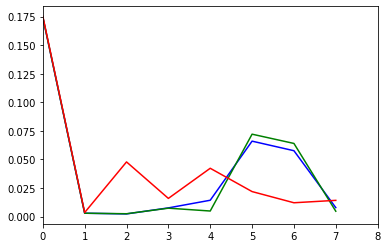

                     target_pikachu


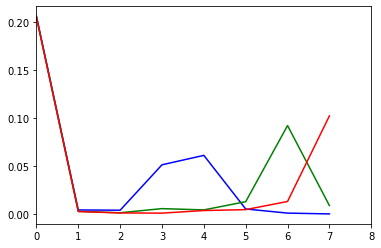

                    target_bulbasaur


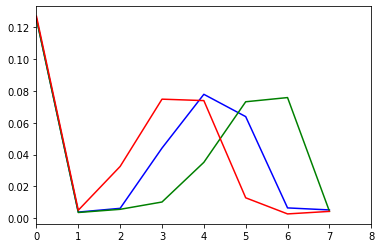

                   target_charmander


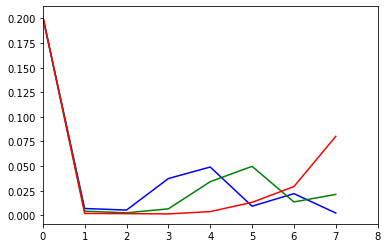

                        mystery6


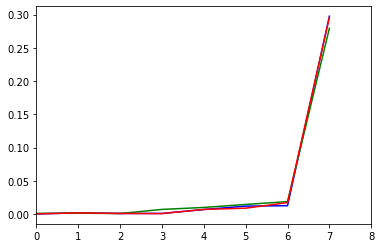

                        mystery2


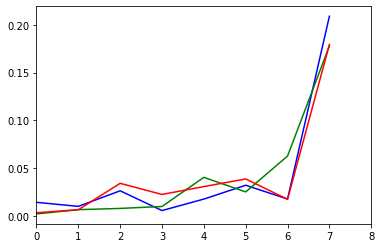

                       mystery10


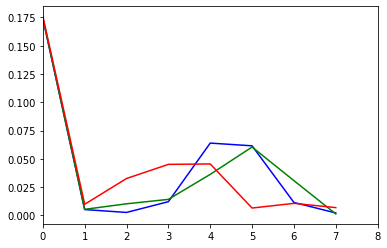

                        mystery8


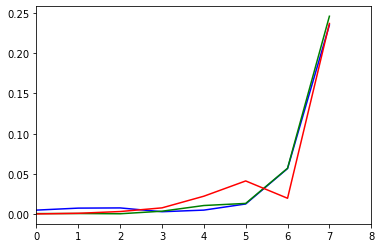

                        mystery5


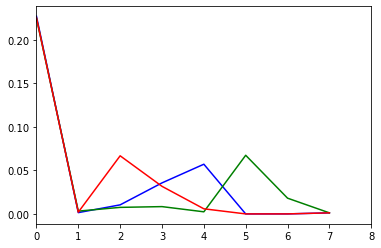

                        mystery7


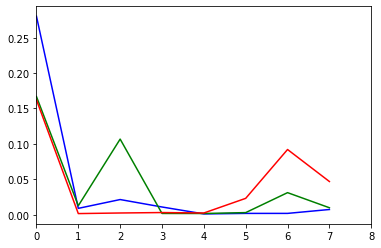

                        mystery3


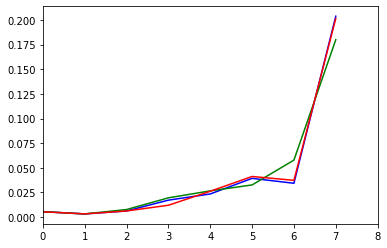

                        mystery1


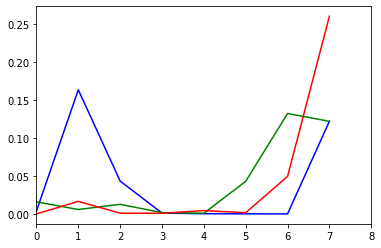

                        mystery4


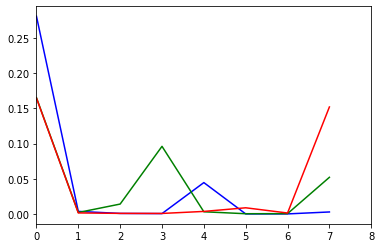

                        mystery9


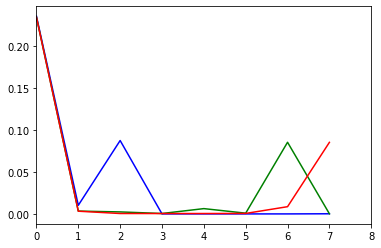

In [81]:
image_path = '/home/CV/HistogramDataset/'
class_list = ['bulbasaur','charmander','pikachu','squirtle']

bins = 8

# Process target images
image_target_dict = read(os.path.join(image_path,'targets'))
hist_target_dict = histogram_generator(image_target_dict, number_bins = bins)
plot_histograms(hist_target_dict)

image_class_dict = dict()
hist_class_dict = dict()

for c in class_list:
    image_class_dict[c] = read(os.path.join(image_path,'classes',c))
    hist_class_dict[c] = histogram_generator(image_class_dict[c],  number_bins = bins)
    
# Process Test Images
image_mystery_dict = read(os.path.join(image_path,'mystery'))
hist_mystery_dict = histogram_generator(image_mystery_dict,  number_bins = bins)
plot_histograms(hist_mystery_dict)

In [11]:
print(hist_class_dict)

{'bulbasaur': {'9.png': array([1.18555911e-01, 4.76768166e-02, 1.73629001e-02, 2.46002153e-02,
       1.11362453e-04, 1.21598780e-01, 1.79641950e-03, 1.63093116e-03,
       1.19870484e-01, 5.97873295e-04, 6.51999202e-04, 4.89621540e-04,
       1.13959871e-02, 3.06156538e-02, 1.57920986e-01, 1.17907329e-02,
       1.29638344e-01, 7.89802463e-04, 1.39980735e-02, 1.70201026e-02,
       1.57977909e-01, 4.04388811e-05, 1.02002406e-02, 3.66842863e-03],
      dtype=float32), '6.png': array([0.09359932, 0.11119504, 0.0292369 , 0.02831713, 0.04461267,
       0.0229969 , 0.00071547, 0.0026599 , 0.00050333, 0.0067465 ,
       0.00776863, 0.10866483, 0.04980448, 0.02839745, 0.04153888,
       0.08990923, 0.1963128 , 0.01395226, 0.04904217, 0.05265744,
       0.01236894, 0.00464588, 0.00204786, 0.00230598], dtype=float32), '2.png': array([0.0132058 , 0.05659793, 0.01163221, 0.04745369, 0.02894266,
       0.0556992 , 0.01531752, 0.10448433, 0.00225008, 0.00905645,
       0.01339671, 0.07027267, 0.02

In [82]:
OPENCV_METHODS = (
        ("Correlation", cv2.HISTCMP_CORREL, True),
        ("Chi-Squared", cv2.HISTCMP_CHISQR, False),
        ("Intersection", cv2.HISTCMP_INTERSECT, True),
        ("Hellinger", cv2.HISTCMP_BHATTACHARYYA, False))

def compare_histogram(image_name, hist_base, histogram_dict):
    results_dict = dict()
    for (methodName, method, reverse) in OPENCV_METHODS:
        results = {k: cv2.compareHist(hist_base, hist, method) for (k,hist) in sorted(histogram_dict.items())} #dictionary comprehension (k = filename, item = cv2.compareHist(targetHistBase, hist, method))
        results =  sorted([(v, k) for (k, v) in results.items()], reverse = reverse)
        results_dict[methodName] = results
    return results_dict

In [18]:
# Triple Dict [className_target][className][histName]
target_class_compare_dict = defaultdict(dict)

for (image_name, hist_base) in hist_target_dict.items():
    # convert to target name
    target_class = image_name.split('.')[0].split('_')[1]
    for class_name in class_list:
        #print(class_name)
        #print(image_name)
        #print(compare_histogram(image_name, hist_base, hist_class_dict[class_name]))
        target_class_compare_dict[target_class][class_name] = compare_histogram(image_name, hist_base, hist_class_dict[class_name])
        
print(target_class_compare_dict)

'''
print ('Comparison between own target_class and class_name: \n')
print('Bulbasaur: ')
print (target_class_compare_dict['bulbasaur']['pikachu']["Correlation"])
print (target_class_compare_dict['bulbasaur']['pikachu']["Chi-Squared"])
print (target_class_compare_dict['bulbasaur']['pikachu']["Intersection"])
print (target_class_compare_dict['bulbasaur']['pikachu']["Hellinger"])

print('\nCharmander: ')
print (target_class_compare_dict['charmander']['charmander']["Correlation"])
print (target_class_compare_dict['charmander']['charmander']["Chi-Squared"])
print (target_class_compare_dict['charmander']['charmander']["Intersection"])
print (target_class_compare_dict['charmander']['charmander']["Hellinger"])

print('\nPikachu: ')
print (target_class_compare_dict['pikachu']['pikachu']["Correlation"])
print (target_class_compare_dict['pikachu']['pikachu']["Chi-Squared"])
print (target_class_compare_dict['pikachu']['pikachu']["Intersection"])
print (target_class_compare_dict['pikachu']['pikachu']["Hellinger"])

print('\nSquirtle: ')
print (target_class_compare_dict['squirtle']['squirtle']["Correlation"])
print (target_class_compare_dict['squirtle']['squirtle']["Chi-Squared"])
print (target_class_compare_dict['squirtle']['squirtle']["Intersection"])
print (target_class_compare_dict['squirtle']['squirtle']["Hellinger"])

print('\nPik: ')
print (target_class_compare_dict['pikachu']['pikachu']["Correlation"])
print (target_class_compare_dict['pikachu']['charmander']["Correlation"])
print (target_class_compare_dict['pikachu']['bulbasaur']["Correlation"])
print (target_class_compare_dict['pikachu']['squirtle']["Correlation"])
'''

defaultdict(<class 'dict'>, {'squirtle': {'bulbasaur': {'Correlation': [(0.9271815349758035, '8.png'), (0.7053155806898, '9.png'), (0.3578493405145092, '6.png'), (0.03141644634421185, '5.png'), (-0.14602274800739937, '1.png'), (-0.14905508237785864, '3.png'), (-0.2185658030054105, '7.png'), (-0.21942779950385147, '10.png'), (-0.3005653338987797, '4.png'), (-0.33034306365642874, '2.png')], 'Chi-Squared': [(0.5250794121847664, '8.png'), (1.526901387286375, '9.png'), (2.6963266754956856, '5.png'), (5.637396696790708, '3.png'), (6.632332556245979, '7.png'), (6.912073240062431, '2.png'), (8.164718653620154, '6.png'), (8.544865594960694, '1.png'), (10.442662313885997, '4.png'), (21.771193279469152, '10.png')], 'Intersection': [(0.6886286503868178, '8.png'), (0.643686251136387, '9.png'), (0.5044745795894414, '6.png'), (0.451567615615204, '5.png'), (0.4161505096126348, '2.png'), (0.3884998725261539, '1.png'), (0.37625462212599814, '7.png'), (0.3716233406448737, '3.png'), (0.36294067942071706, 

'\nprint (\'Comparison between own target_class and class_name: \n\')\nprint(\'Bulbasaur: \')\nprint (target_class_compare_dict[\'bulbasaur\'][\'pikachu\']["Correlation"])\nprint (target_class_compare_dict[\'bulbasaur\'][\'pikachu\']["Chi-Squared"])\nprint (target_class_compare_dict[\'bulbasaur\'][\'pikachu\']["Intersection"])\nprint (target_class_compare_dict[\'bulbasaur\'][\'pikachu\']["Hellinger"])\n\nprint(\'\nCharmander: \')\nprint (target_class_compare_dict[\'charmander\'][\'charmander\']["Correlation"])\nprint (target_class_compare_dict[\'charmander\'][\'charmander\']["Chi-Squared"])\nprint (target_class_compare_dict[\'charmander\'][\'charmander\']["Intersection"])\nprint (target_class_compare_dict[\'charmander\'][\'charmander\']["Hellinger"])\n\nprint(\'\nPikachu: \')\nprint (target_class_compare_dict[\'pikachu\'][\'pikachu\']["Correlation"])\nprint (target_class_compare_dict[\'pikachu\'][\'pikachu\']["Chi-Squared"])\nprint (target_class_compare_dict[\'pikachu\'][\'pikachu\']["

squirtle
classes: bulbasaur
histMethod: {'Correlation': [(0.9271815349758035, '8.png'), (0.7053155806898, '9.png'), (0.3578493405145092, '6.png'), (0.03141644634421185, '5.png'), (-0.14602274800739937, '1.png'), (-0.14905508237785864, '3.png'), (-0.2185658030054105, '7.png'), (-0.21942779950385147, '10.png'), (-0.3005653338987797, '4.png'), (-0.33034306365642874, '2.png')], 'Chi-Squared': [(0.5250794121847664, '8.png'), (1.526901387286375, '9.png'), (2.6963266754956856, '5.png'), (5.637396696790708, '3.png'), (6.632332556245979, '7.png'), (6.912073240062431, '2.png'), (8.164718653620154, '6.png'), (8.544865594960694, '1.png'), (10.442662313885997, '4.png'), (21.771193279469152, '10.png')], 'Intersection': [(0.6886286503868178, '8.png'), (0.643686251136387, '9.png'), (0.5044745795894414, '6.png'), (0.451567615615204, '5.png'), (0.4161505096126348, '2.png'), (0.3884998725261539, '1.png'), (0.37625462212599814, '7.png'), (0.3716233406448737, '3.png'), (0.36294067942071706, '4.png'), (0.27

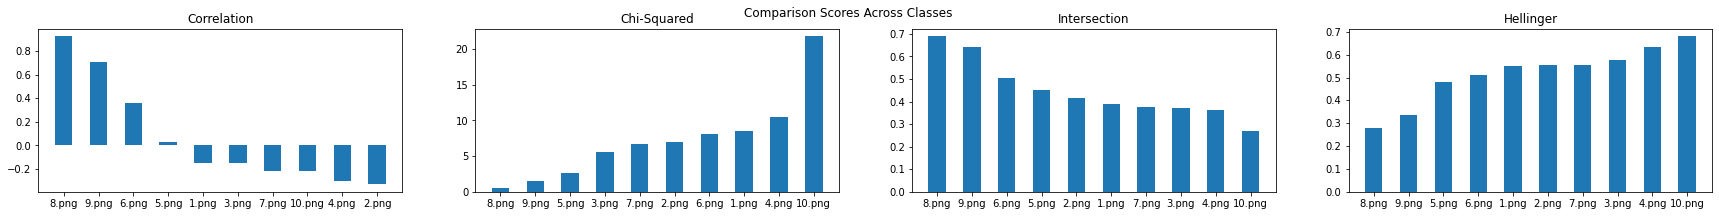

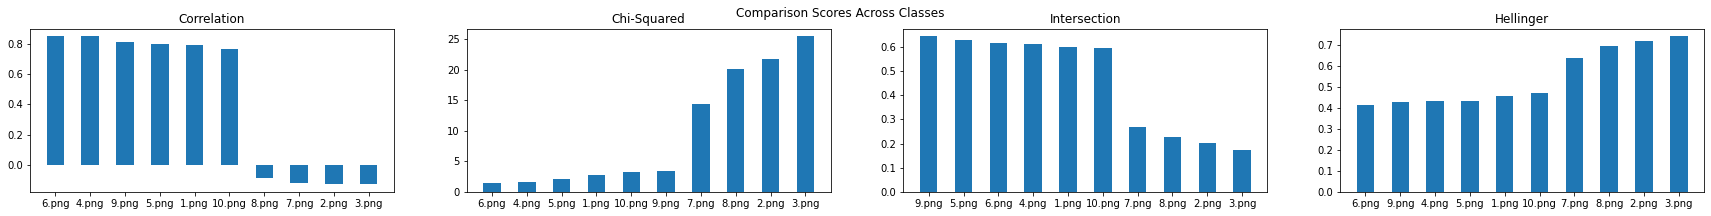

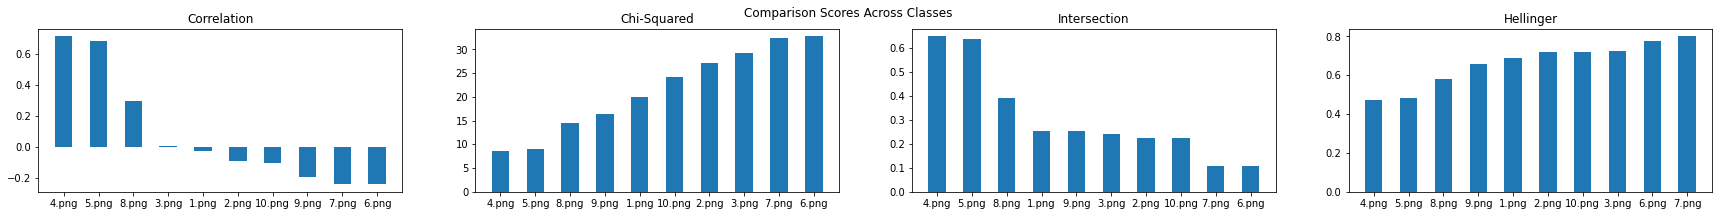

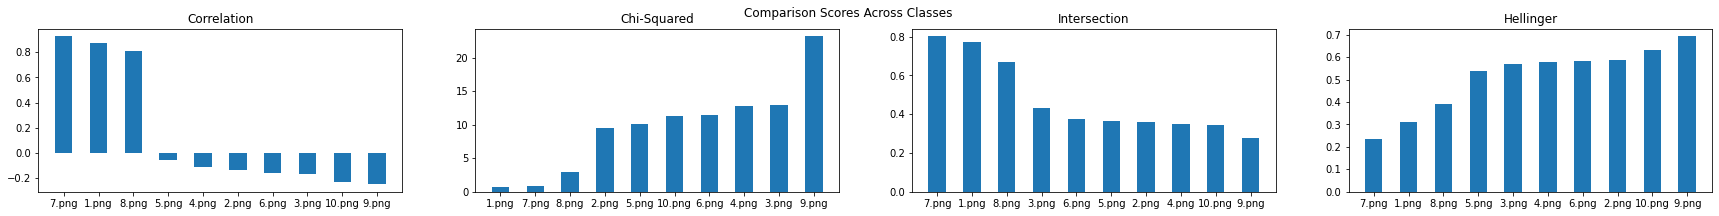

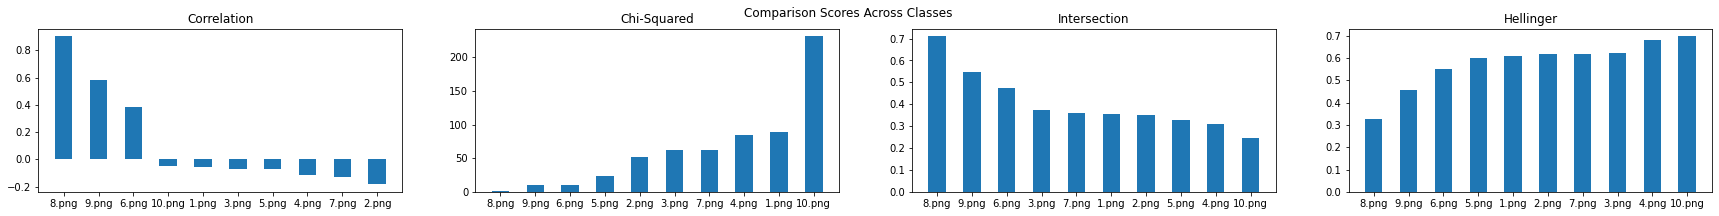

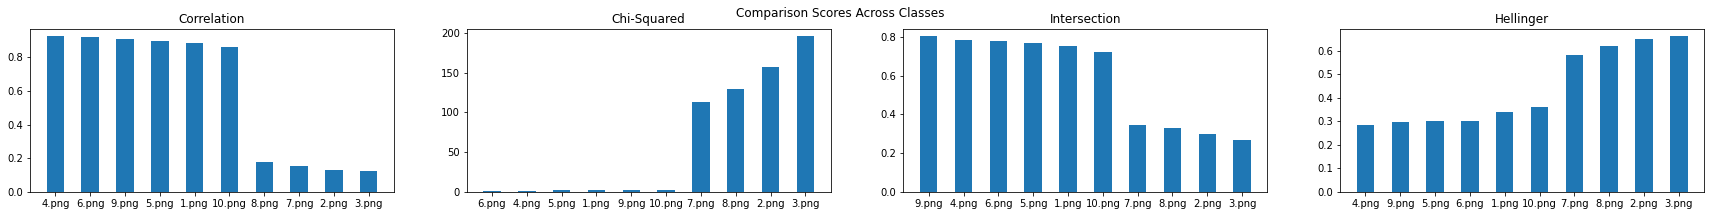

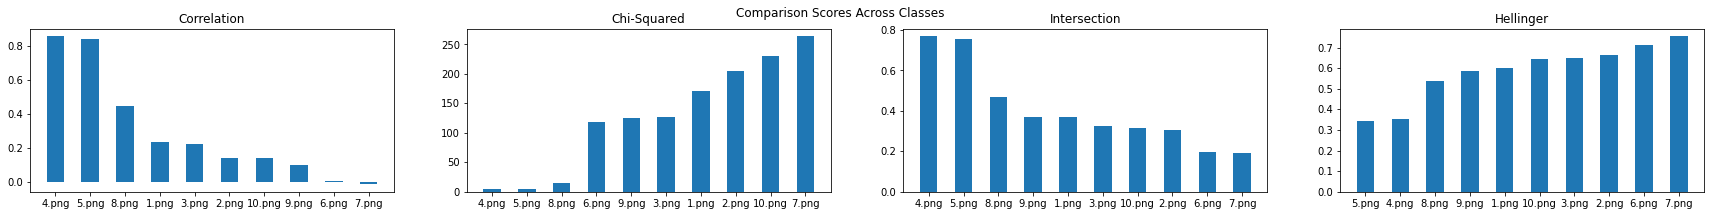

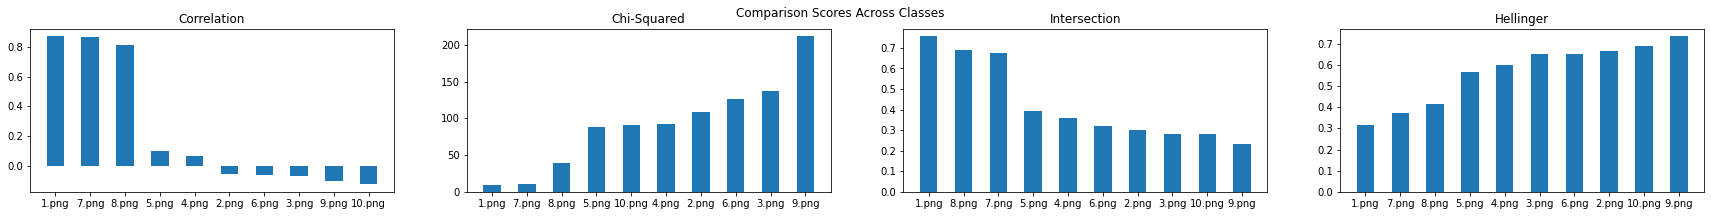

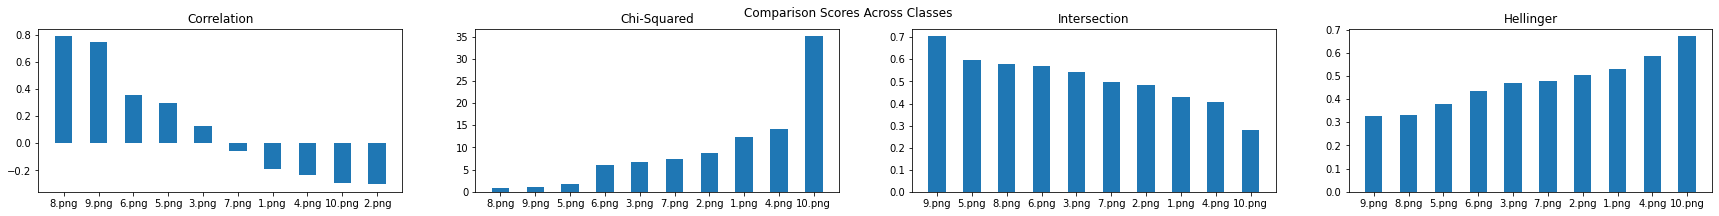

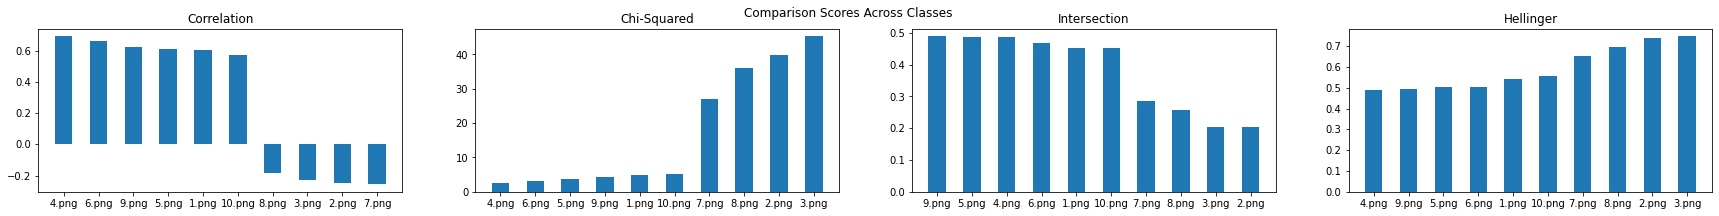

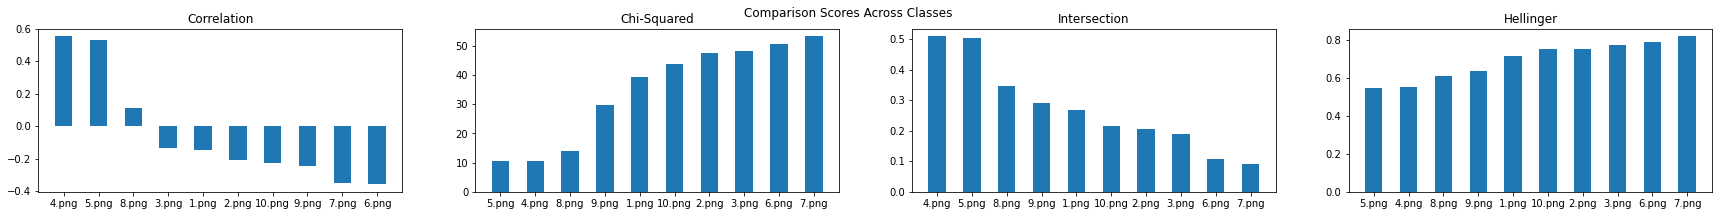

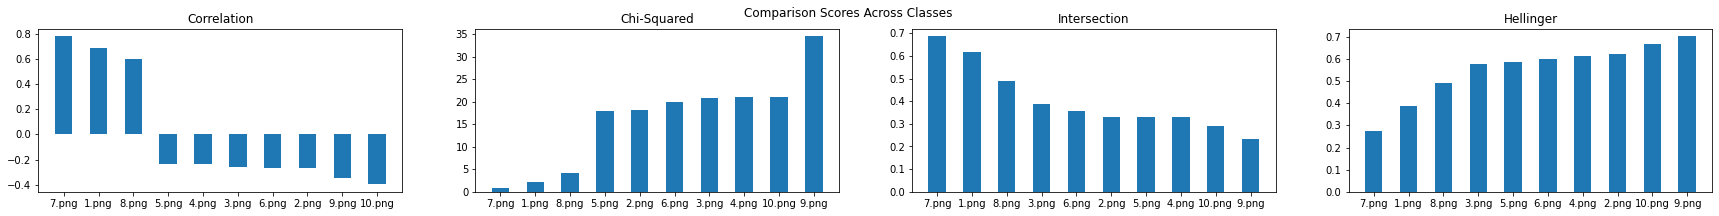

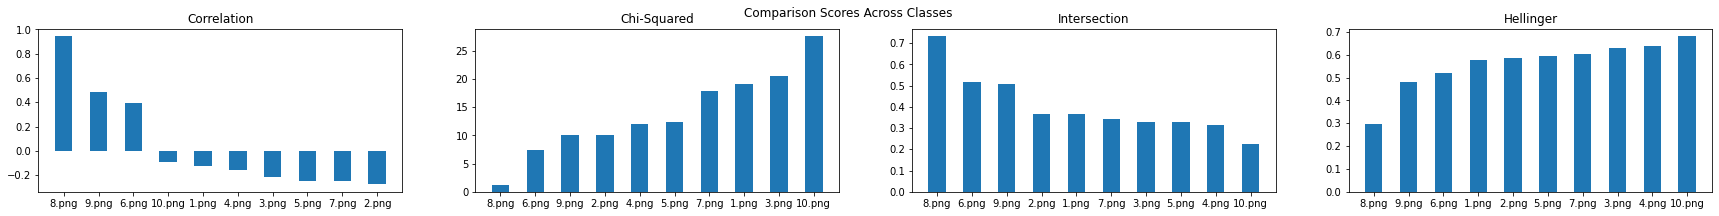

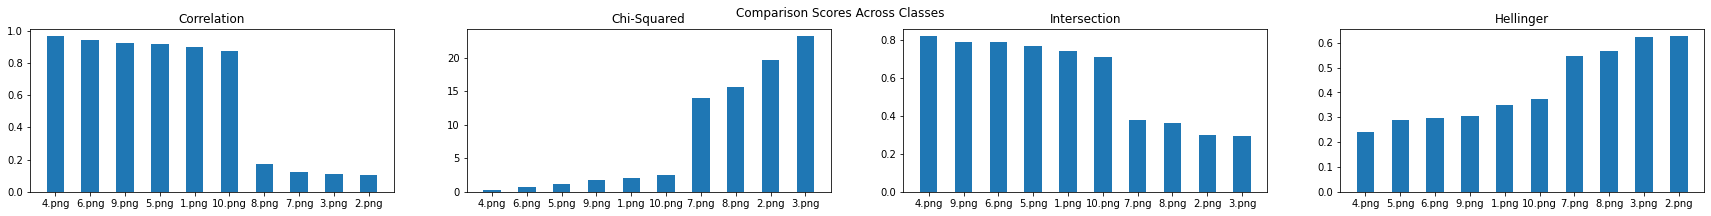

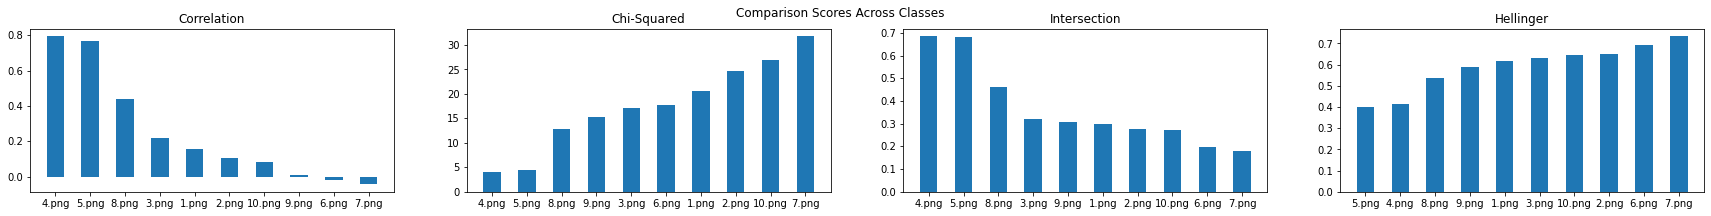

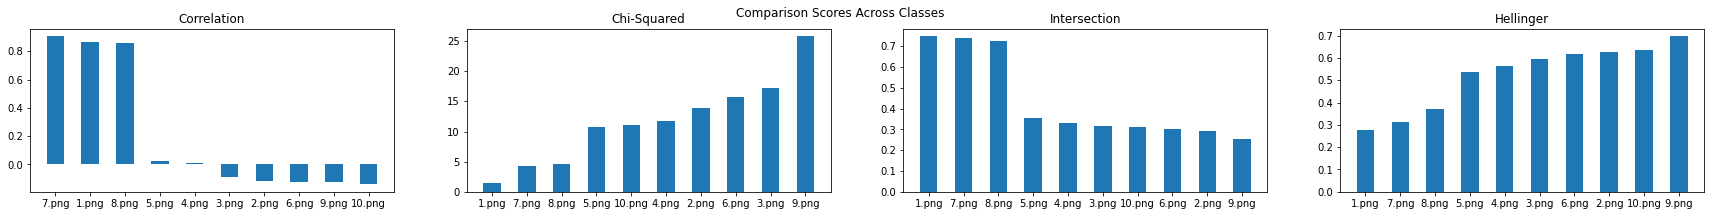

In [71]:
def plot_comparison_scores_across_classes(target_class_compare_dict):
    data = {}
    for key, values in target_class_compare_dict.items():
        print(key)
        #print ('value: ' + str(values))
        for classes, histMethod in values.items():
            print('classes: ' + str(classes))
            print('histMethod: ' + str(histMethod))
            print('Correlation: ' + str(histMethod['Correlation']))
            col1 = graphScores(histMethod,'Correlation')
            col2 = graphScores(histMethod,'Chi-Squared')
            col3 = graphScores(histMethod,'Intersection')
            col4 = graphScores(histMethod,'Hellinger')

            fig, axs = plt.subplots(1, 4, figsize=(30, 3))
            axs[0].set_title('Correlation')
            axs[0].bar(col1[0], col1[1], width = 0.5)
            axs[1].set_title('Chi-Squared')
            axs[1].bar(col2[0], col2[1], width = 0.5)
            axs[2].set_title('Intersection')
            axs[2].bar(col3[0], col3[1], width = 0.5)
            axs[3].set_title('Hellinger')
            axs[3].bar(col4[0], col4[1], width = 0.5)
            
            fig.suptitle('Comparison Scores Across Classes')

def graphScores(histMethod, name):
    data = {}
    for (scores,img) in histMethod[name]:
        data[img] = scores
        x = list(data.keys())
        y = list(data.values())
    return [x, y]
    

plot_comparison_scores_across_classes(target_class_compare_dict)


In [72]:
def calculate_score_range(histogram_scores):
    scores = [score for (score,filename) in histogram_scores]
    avg_score = sum(scores)/len(scores)
    median_score = scores[int(len(scores)/2)]
    max_score = max(scores)
    min_score = min(scores)
    return [avg_score, median_score, max_score, min_score]

def showHistogramScoreData(target_name):
    print (target_name)
    for (methodName, method, reverse) in OPENCV_METHODS:
        # Check base class: target_name with itself
        print (methodName)
        print (target_name, end="")
        print(calculate_score_range(target_class_compare_dict[target_name][target_name][methodName]))

        # Check base class with every oter class name (not itself)
        process_list = [class_name for class_name in class_list if class_name != target_name]

        for class_name in process_list:
            print (class_name, end="")
            print (calculate_score_range(target_class_compare_dict[target_name][class_name][methodName]))
        print ()
        
showHistogramScoreData('charmander')

charmander
Correlation
charmander[0.6040641630036514, 0.8762430517079068, 0.9648501528862824, 0.10541783508926617]
bulbasaur[0.04701089302180163, -0.1589165736826496, 0.9450993133524175, -0.27449266886082413]
pikachu[0.2506733008922942, 0.10619022901589611, 0.7946610787903363, -0.044580306866292996]
squirtle[0.20724291336148978, -0.09019019286361865, 0.9080160883705388, -0.14088098813247804]

Chi-Squared
charmander[8.082067332929675, 2.452492467463056, 23.17409922179755, 0.23793097778342046]
bulbasaur[13.851423385941905, 12.394190406360448, 27.577416420837775, 1.1732374672986337]
pikachu[17.53525615545393, 17.676364884164474, 31.747615558624208, 3.9776631541215095]
squirtle[11.657168436250728, 11.710808819543669, 25.772704830315664, 1.481434297774173]

Intersection
charmander[0.5942276369540196, 0.7076556793908821, 0.8179041574767325, 0.2921979373204522]
bulbasaur[0.4026602343077684, 0.34248414682224393, 0.7319809348555282, 0.22343507502228022]
pikachu[0.36727301841483495, 0.2966993462

<b><h3>Task 3</h3><b>
<h4>Describing My Histogram Approach</h4>
    I based my approach off of the knowledge I had regarding each histogram comparison method shown in the table below:
<table style="width:50%">
    <tr>
        <td><b>Histograms</b></td>
        <td><b>Correlation</b></td>
        <td><b>Chi Square</b></td>
        <td><b>Intersection</b></td>
        <td><b>Bhattacharyya</b></td>
    </tr>
    <tr>
        <td>Exact Match</td>
        <td>1.0</td>
        <td>0.0</td>
        <td>1.0</td>
        <td>0.0</td>
    </tr>
    <tr>
        <td>Matches Half</td>
        <td>0.7</td>
        <td>0.67</td>
        <td>0.5</td>
        <td>0.55</td>
    </tr>
    <tr>
        <td>Mismatch</td>
        <td>-1.0</td>
        <td>2.0</td>
        <td>0.0</td>
        <td>1.0</td>
    </tr>
</table>

As we can see, the metric closest to 1.0 for correlation and Intersection and the closer to 0.0 for Chi Square and Battacharyya the closer the test input image is to the target image. My goal was to compare each mystery image to the classes pikachu, bulbasaur, charmander, and squirtle using the histogram compare method and gather the numbers for all of the histogram compare scenarios Correlation, Chi- Squared, Intersection, and Bhattacharyya. I would then calculate the percent error for each histogram comparison method and store all the values in an array. After narrowing down which arrays had the smallest percent error the final array would be [smallest_%_error_correlation, smallest_%_error_chiSquared, smallest_%_error_intersection, smallest_%_error_hellinger]. I would then determine which indices (which is linked with the class it is) correlated with the lowest percent error and I would take the indices that occured the most and determine that to be the class it was. Run the cell below to see an example to show the results of inputing an image and comparing it to the other mystery images to output the final image it is.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:47: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


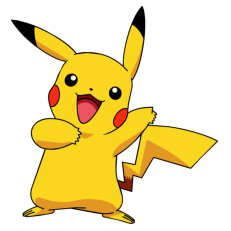

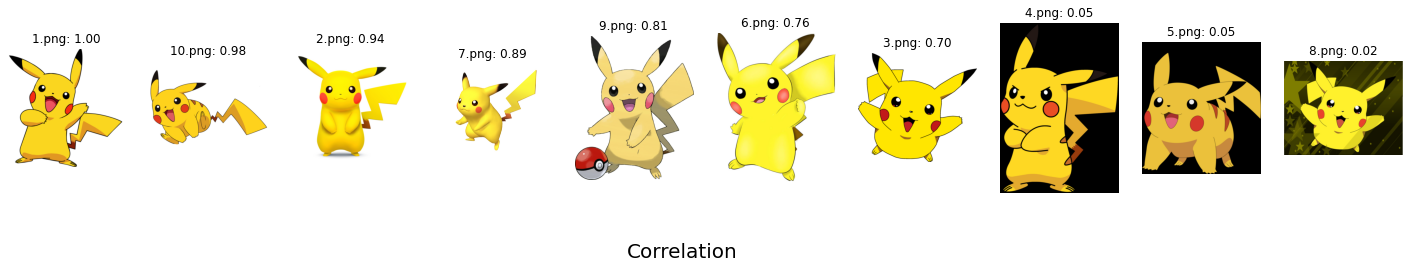

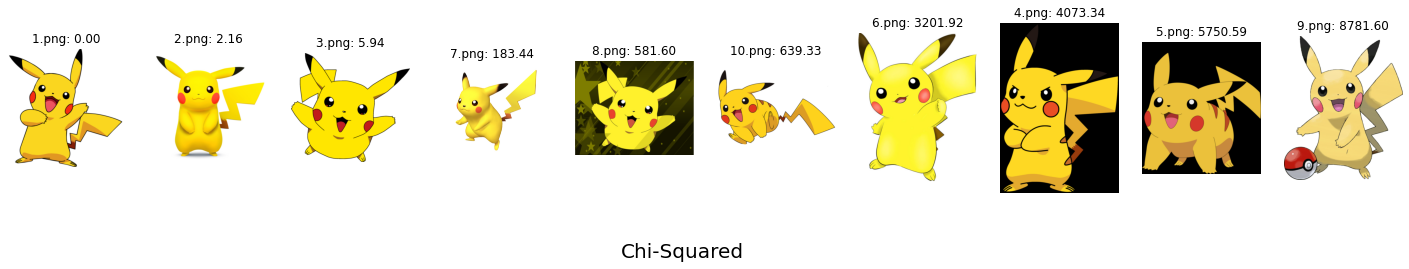

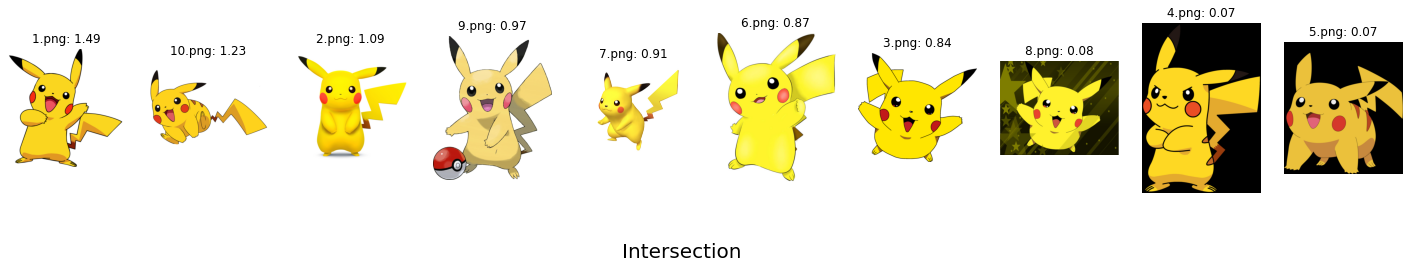

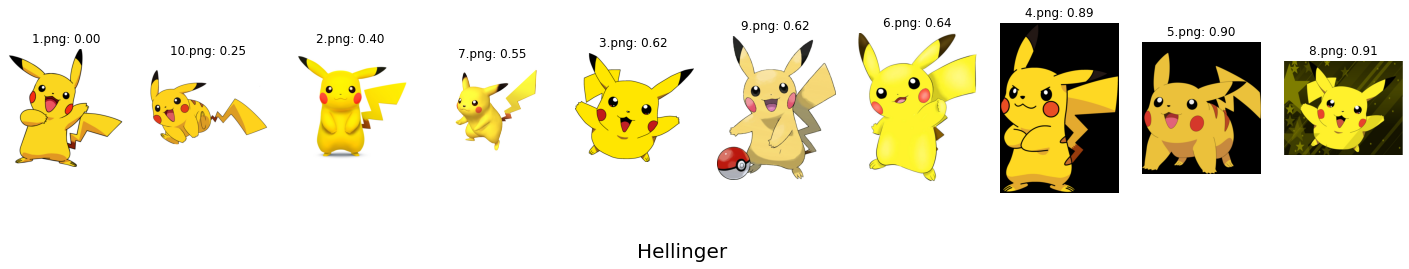

final: [0.0, 0.0, 3.295935246353565, 0.0]
indices: [0, 0, 3, 0]
Image is: 1


In [88]:
OPENCV_METHODS = (
        ("Correlation", cv2.HISTCMP_CORREL),
        ("Chi-Squared", cv2.HISTCMP_CHISQR),
        ("Intersection", cv2.HISTCMP_INTERSECT),
        ("Hellinger", cv2.HISTCMP_BHATTACHARYYA))

def compareHistograms(imagesPath, testImg, channels = [0,1,2], bins = [8,8,8], histRange = [0, 256, 0, 256, 0, 256], comparisonMethods = OPENCV_METHODS):
    images = dict()
    histogram_index = dict()
    histogram_compare = dict()
    for imagePath in glob.glob(str(imagesPath) + '*.png'):
        # extract the image filename (assumed to be unique) and
        # load the image, updating the images dictionary
        filename = imagePath[imagePath.rfind("/") + 1:]
        image = cv2.imread(imagePath)
        images[filename] = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # extract a 3D RGB color histogram from the image,
         # using 8 bins per channel, normalize, and update
        # the index
        hist = cv2.calcHist([image], channels, None, bins, histRange)
        hist = cv2.normalize(hist, hist).flatten()
        histogram_index[filename] = hist
        
    for position,(methodName, method) in enumerate(comparisonMethods):
            # initialize the results dictionary and the sort
            # direction
            results = {}
            reverse = False
            # if we are using the correlation or intersection
            # method, then sort the results in reverse order
            if methodName in ("Correlation", "Intersection"):
                    reverse = True

            # loop over the index
            for (k, hist) in histogram_index.items():
                # compute the distance between the two histograms
                # using the method and update the results dictionary
                d = cv2.compareHist(histogram_index[testImg], hist, method)
                results[k] = d

            # sort the results
            results = sorted([(v, k) for (k, v) in results.items()], reverse = reverse)
            
            # show the query image
            fig = plt.figure('Query')
            ax = fig.add_subplot(1, 1, 1)
            ax.imshow(images[testImg])
            plt.axis("off")

            # initialize the results figure
            fig = plt.figure("Results: %s" % (methodName), figsize=(25, .9))


            # loop over the results
            for (i, (v, k)) in enumerate(results):
                # show the result
                fig.suptitle(methodName, fontsize = 20)
                ax = fig.add_subplot(1, len(images), i + 1)
                ax.set_title("%s: %.2f" % (k, v), fontsize = 12)
                fig.subplots_adjust(top=6)
                plt.imshow(images[k])
                plt.axis("off")
            
            histogram_compare[methodName] = results
            

    # show the OpenCV methods
    plt.show()
    return histogram_compare

def checkHistograms(histogramDict, expCorrInt = 1.0, expChiHelli = 0.0, thresh = 0.9):
    corr = []
    chi = []
    inter = []
    helli = []
    final = []
    indices = []
    for key, value in histogramDict.items():
        for metric in value:
            if (key == 'Correlation'):
                #print (str(metric[1].rsplit('.png',1)[0]) + ' % error: ' + str(((expCorrInt - metric[0]) / expCorrInt) * 100))
                corr.append(((expCorrInt - metric[0]) / expCorrInt) * 100)
            elif (key == 'Chi-Squared'):
                #print (str(metric[1].rsplit('.png',1)[0]) + ' % error: ' + str(((expChiHelli - metric[0])) * 100))
                chi.append((expChiHelli - metric[0]) * 100)
            elif (key == 'Intersection'):
                #print (str(metric[1].rsplit('.png',1)[0]) + ' % error: ' + str(((expCorrInt - metric[0]) / expCorrInt) * 100))
                inter.append(((expCorrInt - metric[0]) / expCorrInt) * 100)
            elif (key == 'Hellinger'):
                #print (str(metric[1].rsplit('.png',1)[0]) + ' % error: ' + str(((expChiHelli - metric[0])) * 100))
                helli.append((expChiHelli - metric[0]) * 100)
    indices.append(corr.index(min(corr, key=abs)))
    indices.append(chi.index(min(chi, key=abs)))
    indices.append(inter.index(min(inter, key=abs)))
    indices.append(helli.index(min(helli, key=abs)))
    mostLikely = (max(set(indices), key = indices.count)) # Which indices occurs the most frequent
    
    final.append(min(corr, key=abs))
    final.append(min(chi, key=abs))
    final.append(min(inter, key=abs))
    final.append(min(helli, key=abs))
    print ('final: ' + str(final))
    print ('indices: ' + str(indices))
    print('Image is: ' + str((value[mostLikely][1]).rsplit('.png',1)[0]))
    return [corr, chi, inter, helli, final]          

pikachuHistograms = compareHistograms('/home/CV/HistogramDataset/classes/pikachu/','1.png')
checkedPikachuHistograms = checkHistograms(pikachuHistograms)

In [ ]:
def checkHistograms(histogramDict, expCorrInt = 1.0, expChiHelli = 0.0, thresh = 0.9):
    corr = []
    chi = []
    inter = []
    helli = []
    final = []
    indices = []
    for key, value in histogramDict.items():
        for metric in value:
            if (key == 'Correlation'):
                #print (str(metric[1].rsplit('.png',1)[0]) + ' % error: ' + str(((expCorrInt - metric[0]) / expCorrInt) * 100))
                corr.append(((expCorrInt - metric[0]) / expCorrInt) * 100)
            elif (key == 'Chi-Squared'):
                #print (str(metric[1].rsplit('.png',1)[0]) + ' % error: ' + str(((expChiHelli - metric[0])) * 100))
                chi.append((expChiHelli - metric[0]) * 100)
            elif (key == 'Intersection'):
                #print (str(metric[1].rsplit('.png',1)[0]) + ' % error: ' + str(((expCorrInt - metric[0]) / expCorrInt) * 100))
                inter.append(((expCorrInt - metric[0]) / expCorrInt) * 100)
            elif (key == 'Hellinger'):
                #print (str(metric[1].rsplit('.png',1)[0]) + ' % error: ' + str(((expChiHelli - metric[0])) * 100))
                helli.append((expChiHelli - metric[0]) * 100)
    indices.append(corr.index(min(corr, key=abs)))
    indices.append(chi.index(min(chi, key=abs)))
    indices.append(inter.index(min(inter, key=abs)))
    indices.append(helli.index(min(helli, key=abs)))
    mostLikely = (max(set(indices), key = indices.count)) # Which indices occurs the most frequent
    
    final.append(min(corr, key=abs))
    final.append(min(chi, key=abs))
    final.append(min(inter, key=abs))
    final.append(min(helli, key=abs))
    print ('final: ' + str(final))
    print ('indices: ' + str(indices))
    print('Image is: ' + str((value[mostLikely][1]).rsplit('.png',1)[0]))
    return [corr, chi, inter, helli, final]          


<b><h3>Task 4</h3><b>
<h4>Mystery Image Classification</h4>

In [87]:
# Triple Dict [className_target][className][histName]
target_class_compare_dict = defaultdict(dict)

for (image_name, hist_base) in hist_mystery_dict.items():
    #print(image_name)
    #print(hist_base)
    # convert to target name
    target_class = image_name.split('.')[0]
    for class_name in class_list:
        #print(class_name)
        #print(image_name)
        #print(compare_histogram(image_name, hist_base, hist_class_dict[class_name]))
        target_class_compare_dict[target_class][class_name] = compare_histogram(image_name, hist_base, hist_class_dict[class_name])
        
#print(target_class_compare_dict)

mystery6
classes: bulbasaur
histMethod: {'Correlation': [(0.9847662332956941, '10.png'), (0.8293296481869449, '4.png'), (0.8033031797457932, '2.png'), (0.7950004916837169, '1.png'), (0.6356121373042873, '7.png'), (0.5257091827323479, '3.png'), (-0.009275934107295004, '5.png'), (-0.1067450275577267, '6.png'), (-0.20047645585802434, '8.png'), (-0.24048552352895455, '9.png')], 'Chi-Squared': [(2.008563727203068, '10.png'), (6.366695307744632, '4.png'), (11.305712964106453, '2.png'), (19.33639130839141, '5.png'), (21.026818933948142, '1.png'), (24.45651234531517, '7.png'), (26.59937916674467, '3.png'), (113.26901482329346, '9.png'), (149.07994824759012, '6.png'), (464.9505905725731, '8.png')], 'Intersection': [(0.7928813768376131, '10.png'), (0.5586589591403026, '4.png'), (0.5206527302798349, '1.png'), (0.4357107330870349, '2.png'), (0.4232978977088351, '7.png'), (0.4005122642556671, '3.png'), (0.23067500049364753, '5.png'), (0.18968998527270742, '6.png'), (0.10212300033890642, '8.png'), (

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  from ipykernel import kernelapp as app


classes: charmander
histMethod: {'Correlation': [(0.9157741015663358, '3.png'), (0.8899140169614191, '2.png'), (0.889064498880518, '7.png'), (0.8696989557449826, '8.png'), (-0.06437876272872706, '5.png'), (-0.08907287046685926, '10.png'), (-0.0914500475445069, '1.png'), (-0.10466297928065292, '4.png'), (-0.13304268387056573, '6.png'), (-0.13557071866197842, '9.png')], 'Chi-Squared': [(1.704487054546305, '3.png'), (1.920785884946935, '7.png'), (2.156623032719209, '2.png'), (2.6470178996529823, '8.png'), (24.855449960760186, '9.png'), (26.07854305125454, '5.png'), (27.657979391380056, '10.png'), (29.427650653704365, '1.png'), (31.24531050723551, '6.png'), (33.13489847854801, '4.png')], 'Intersection': [(0.7387003317126073, '7.png'), (0.6849862798699178, '2.png'), (0.6775277602428105, '8.png'), (0.6745837311609648, '3.png'), (0.27469951252714964, '5.png'), (0.2378076624008827, '9.png'), (0.23585928362444974, '4.png'), (0.22622380996472202, '6.png'), (0.21570702370081563, '10.png'), (0.213

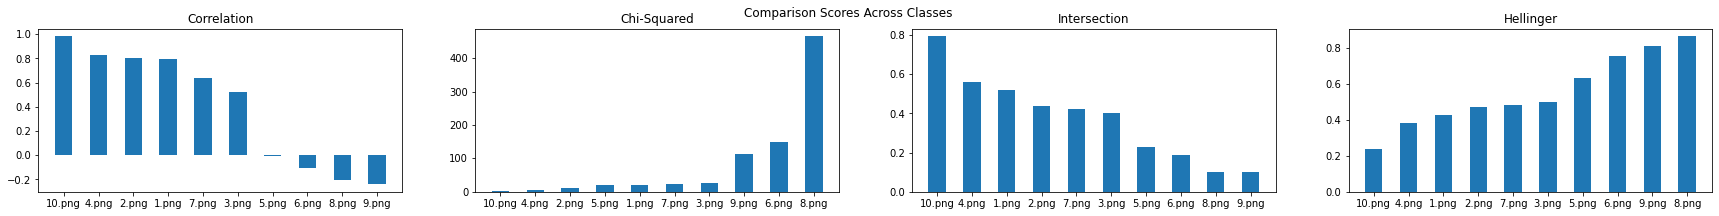

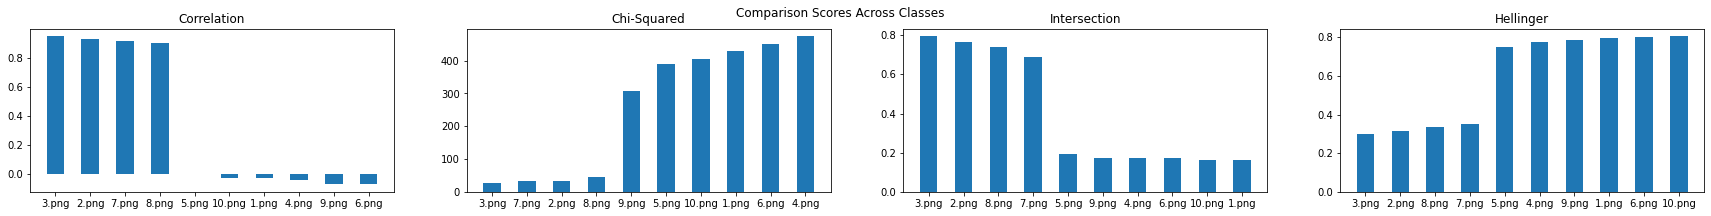

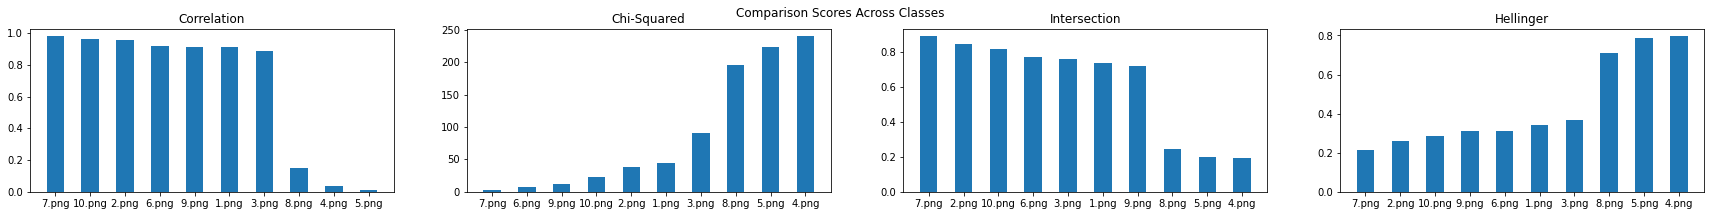

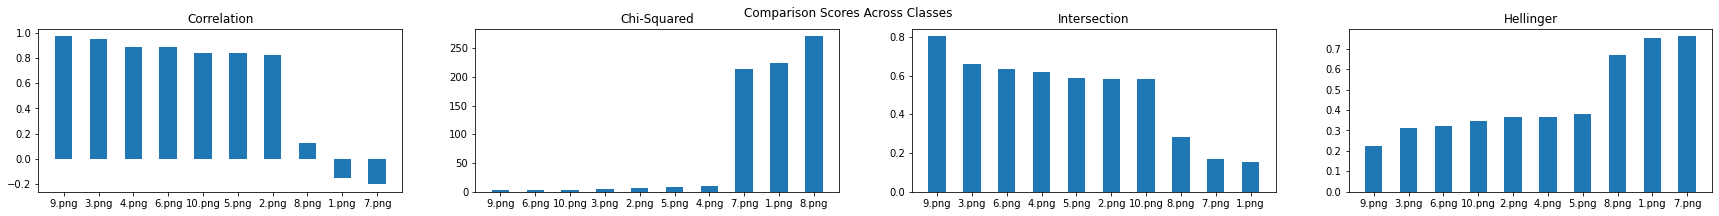

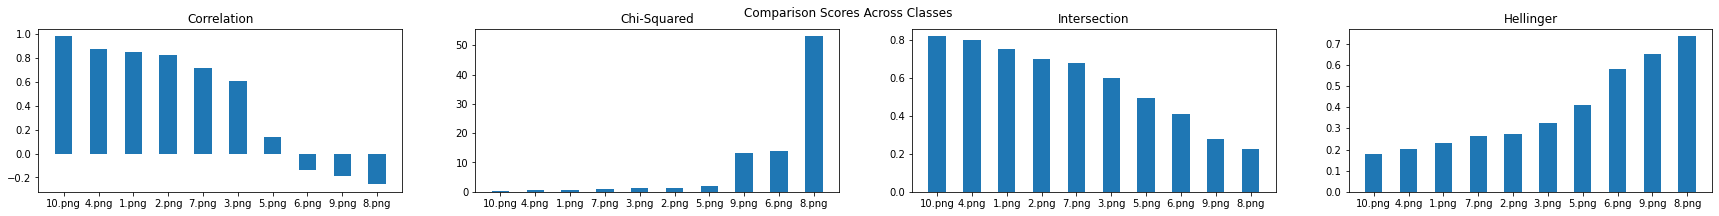

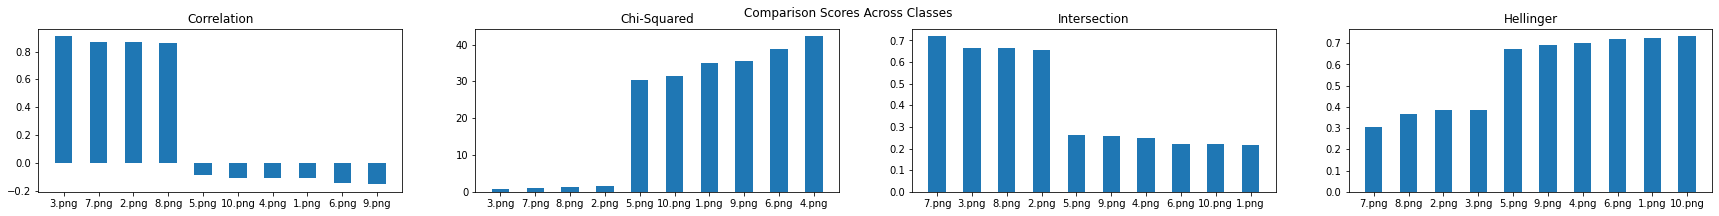

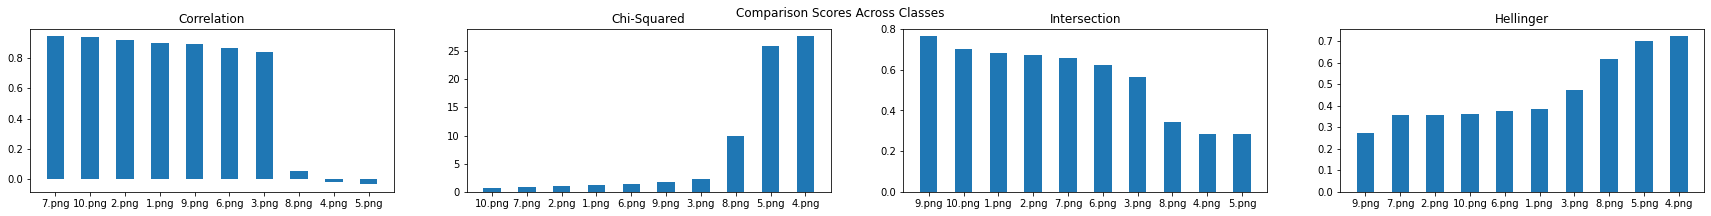

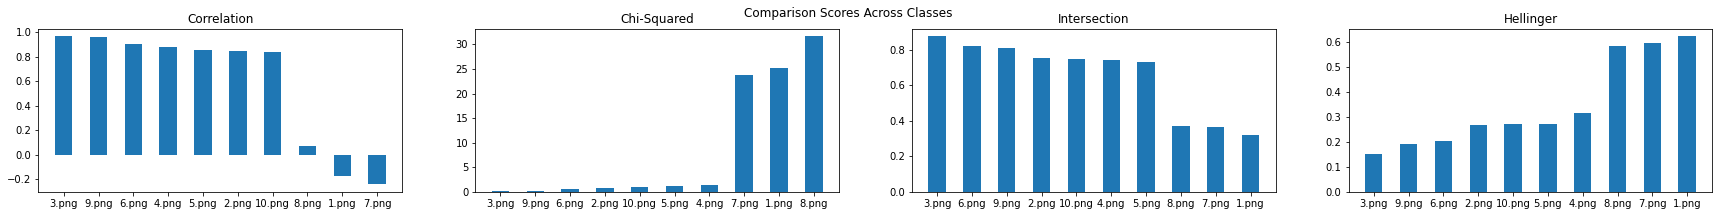

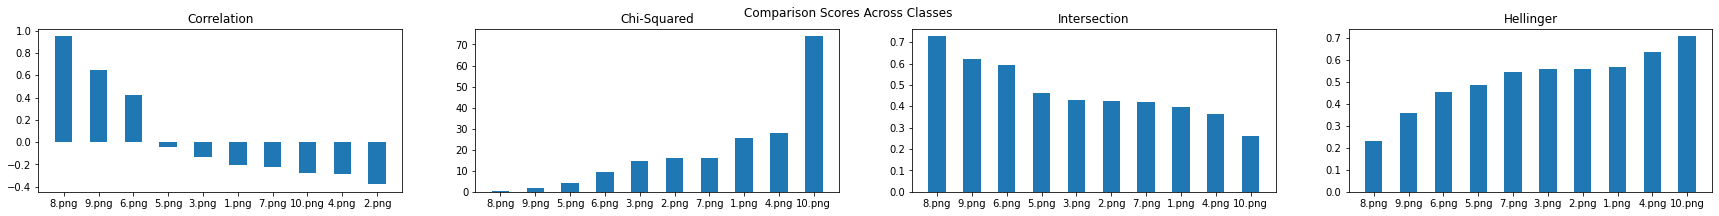

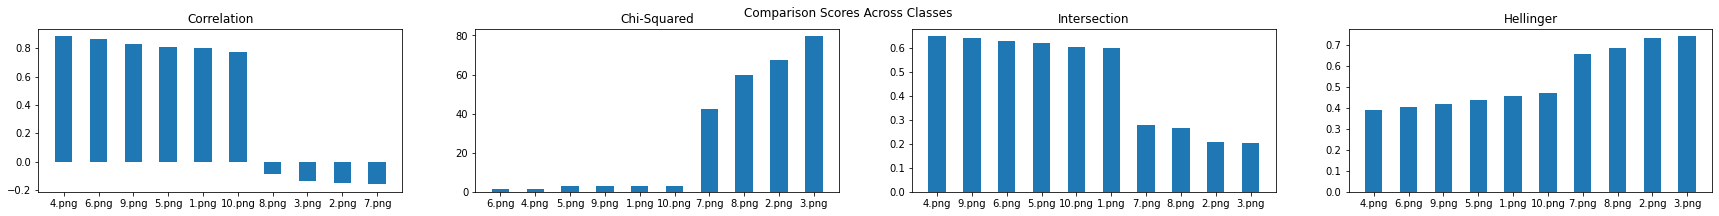

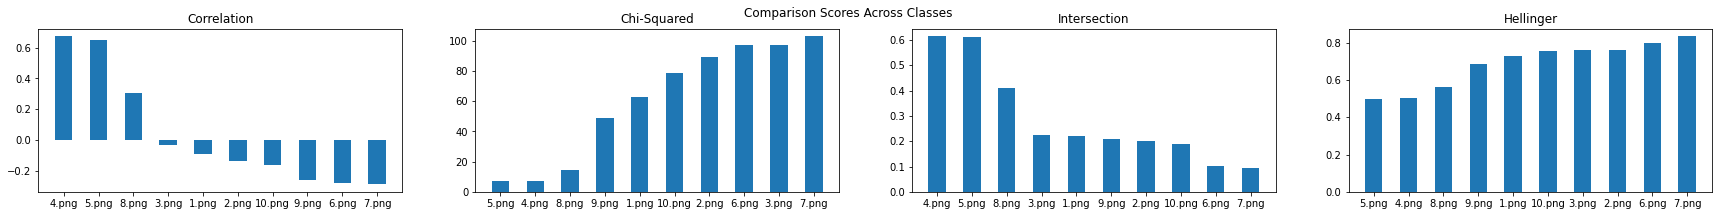

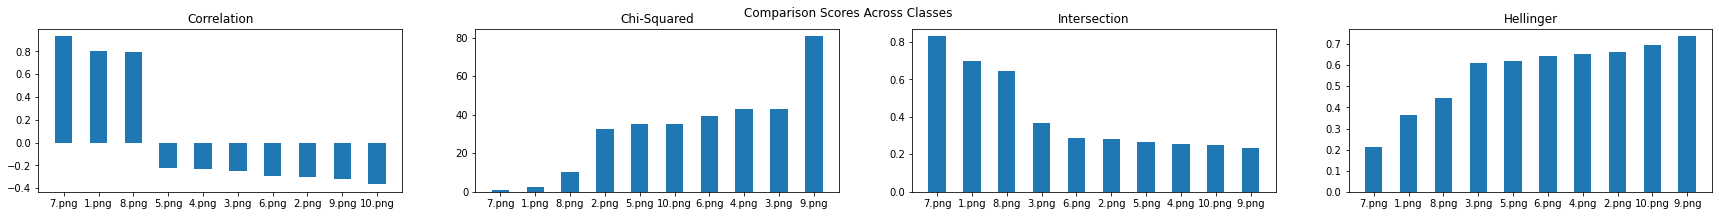

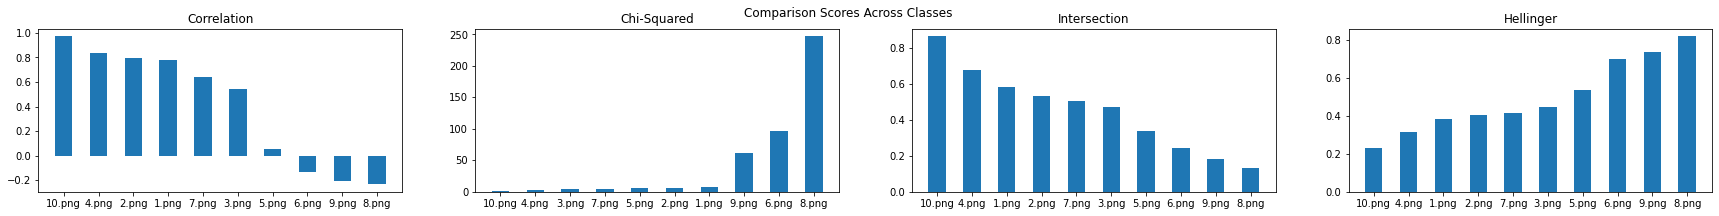

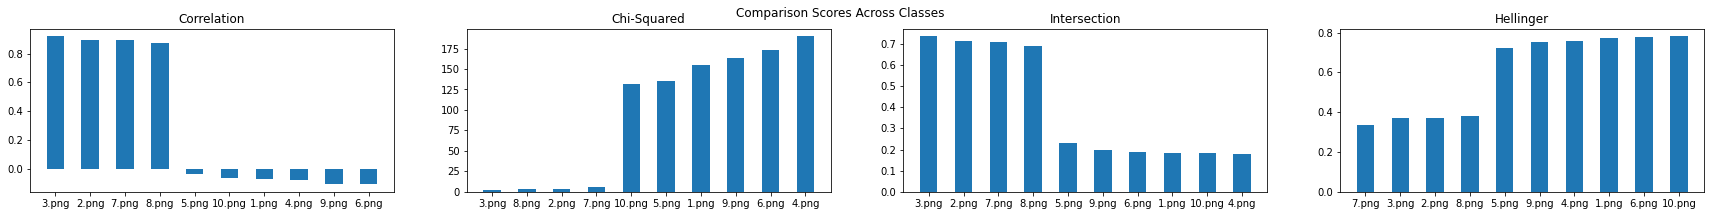

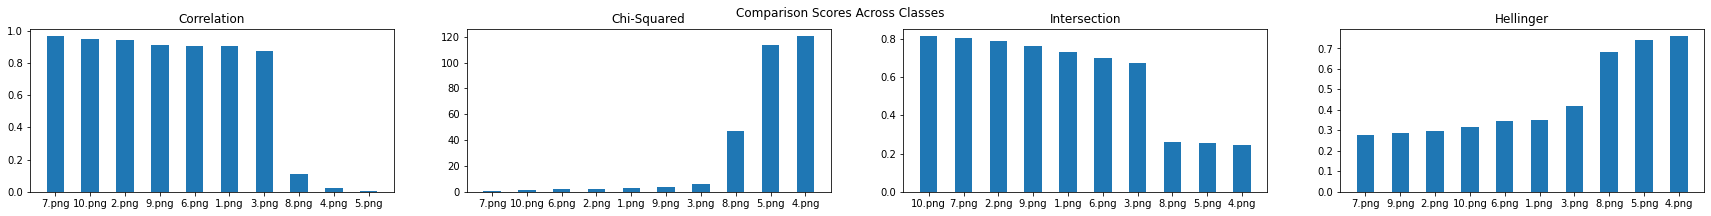

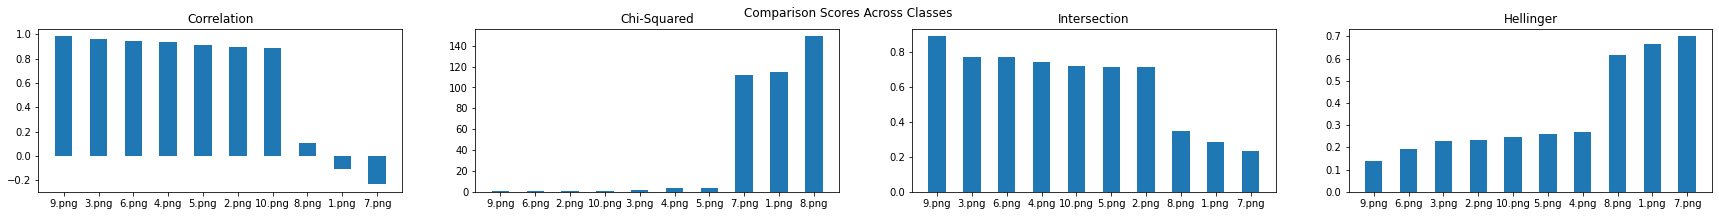

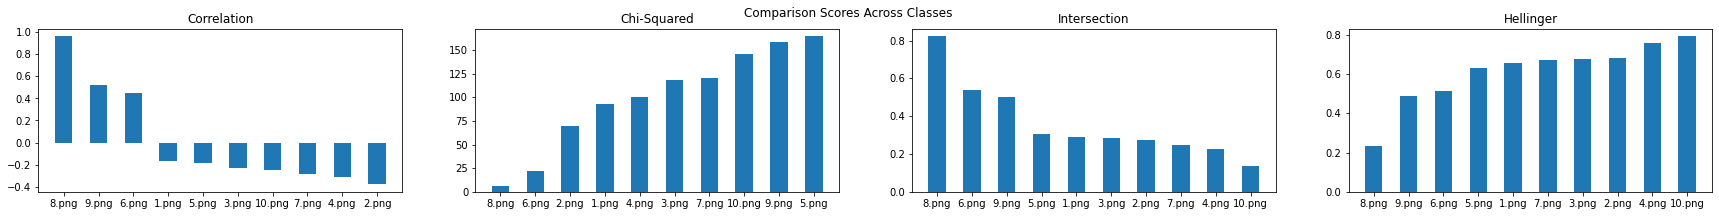

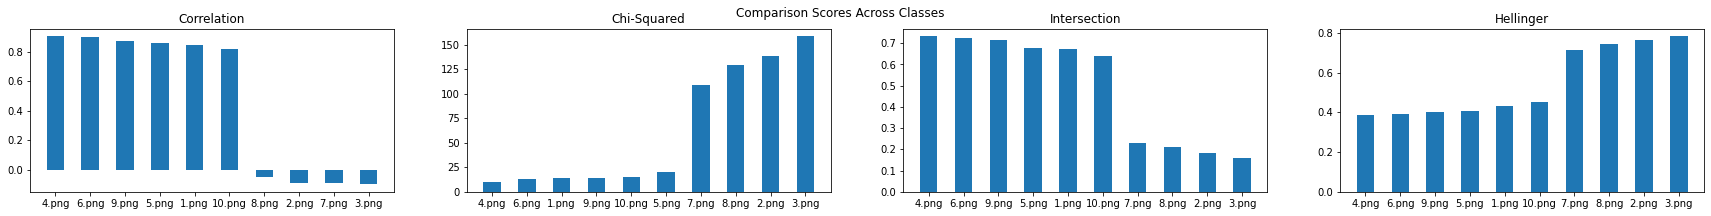

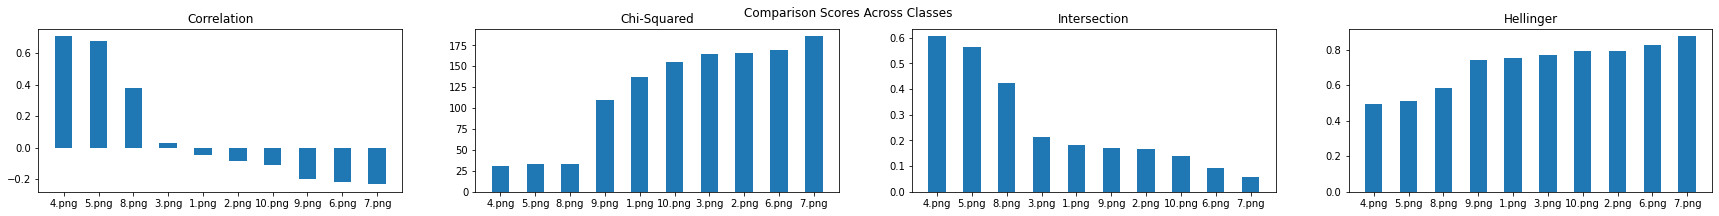

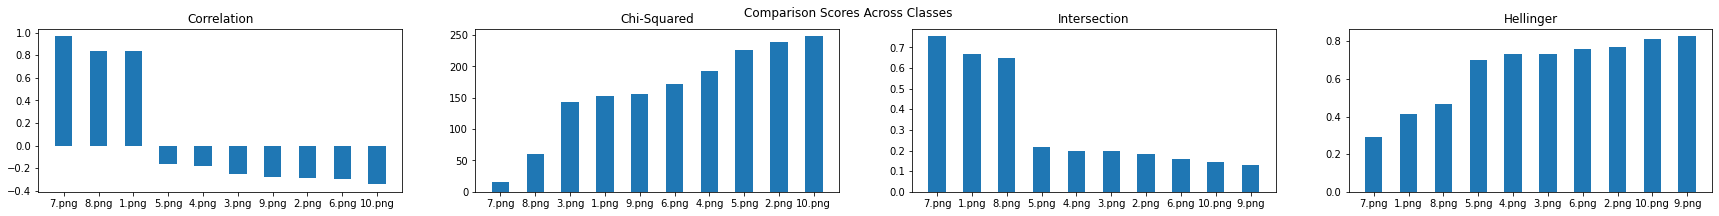

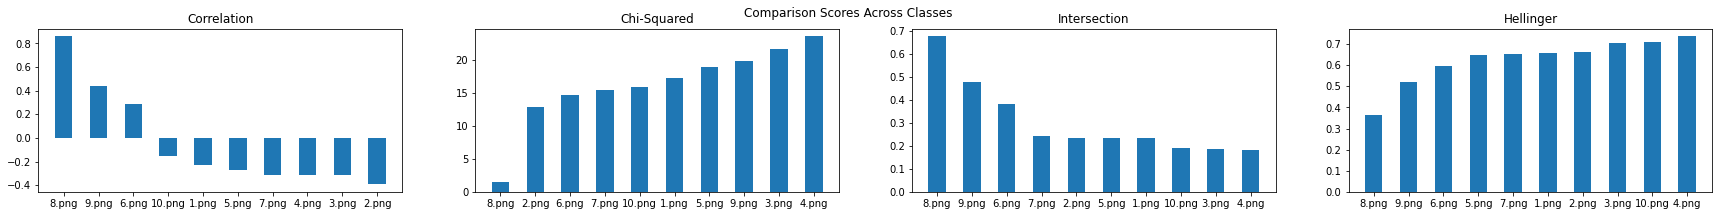

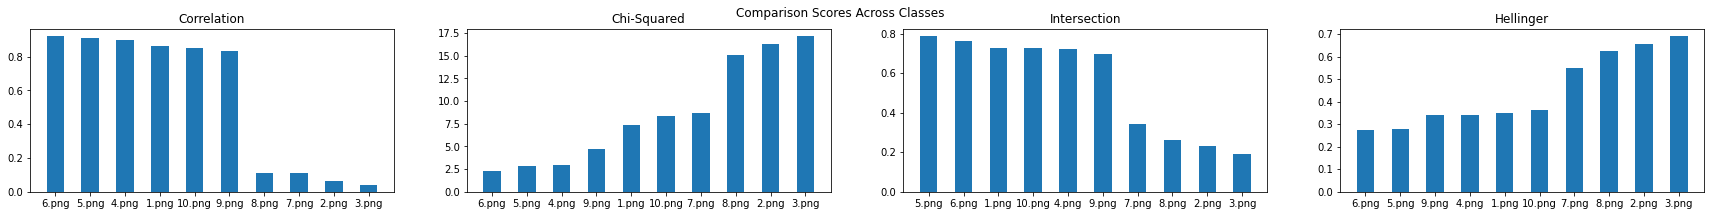

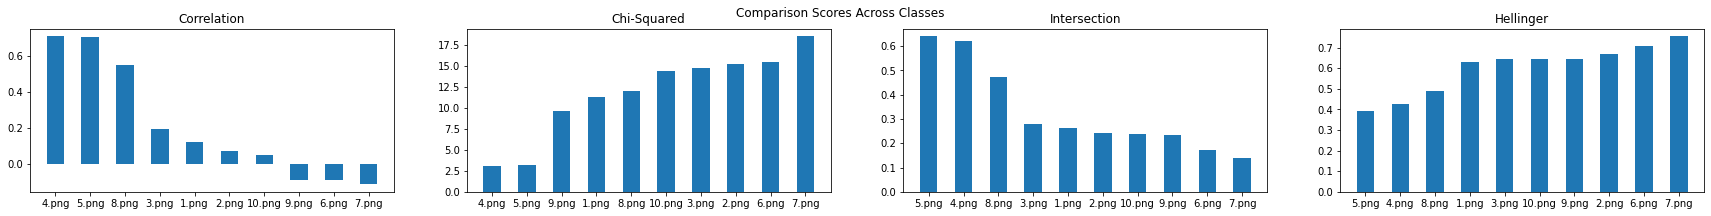

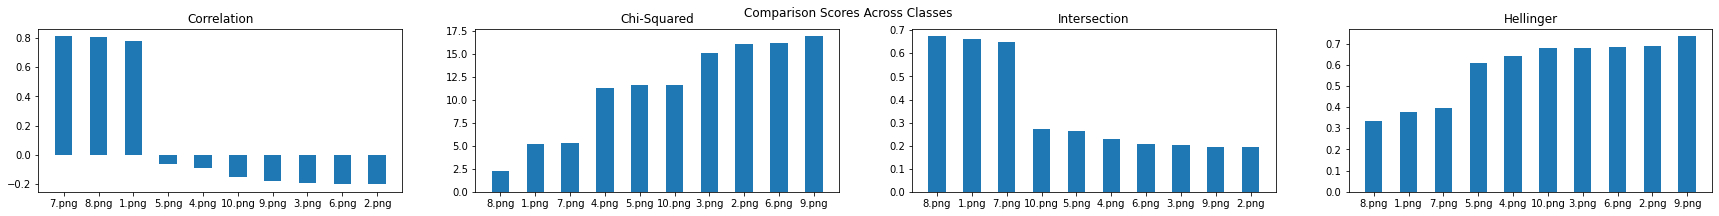

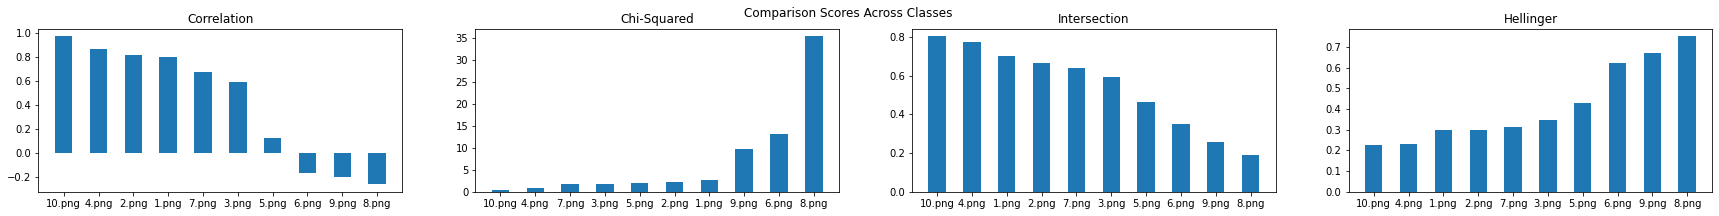

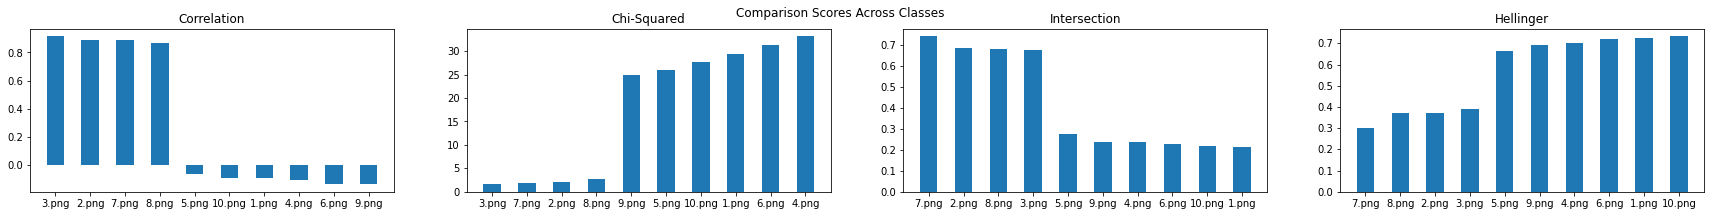

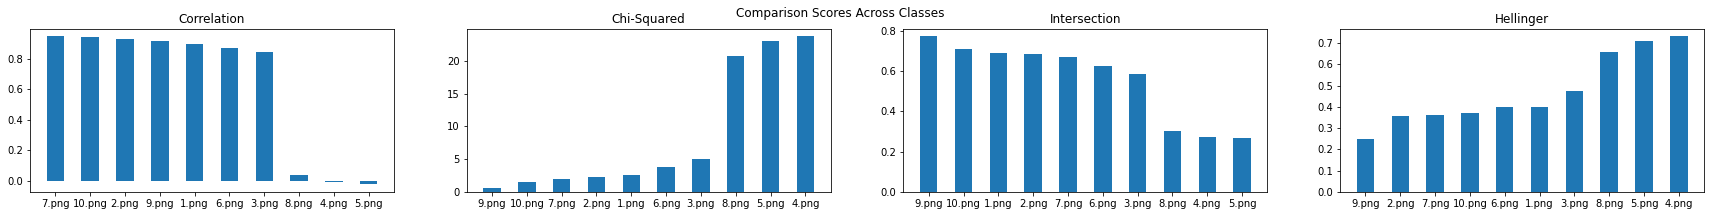

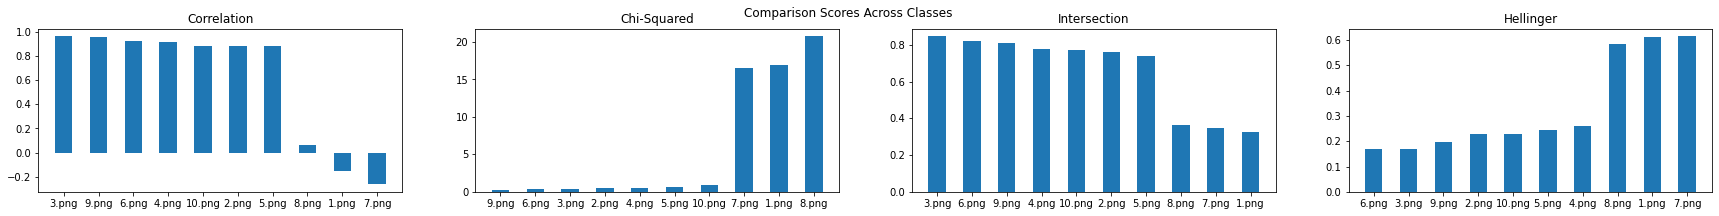

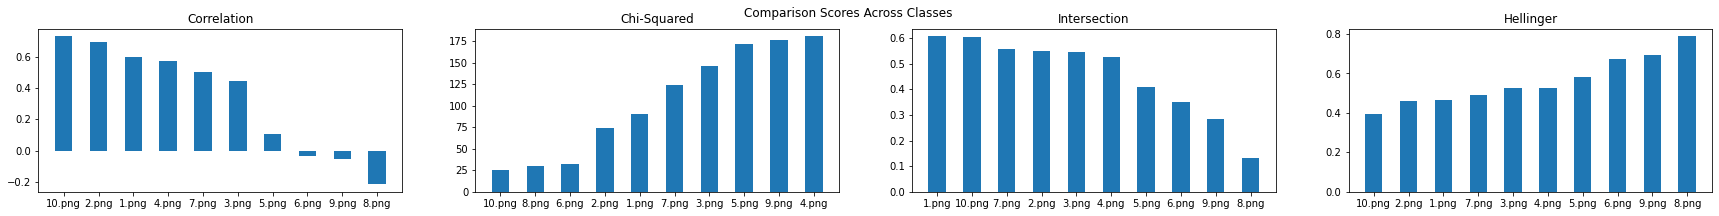

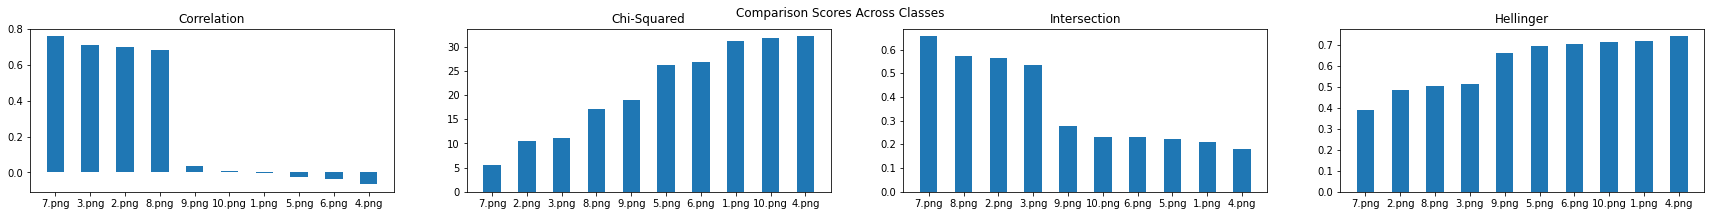

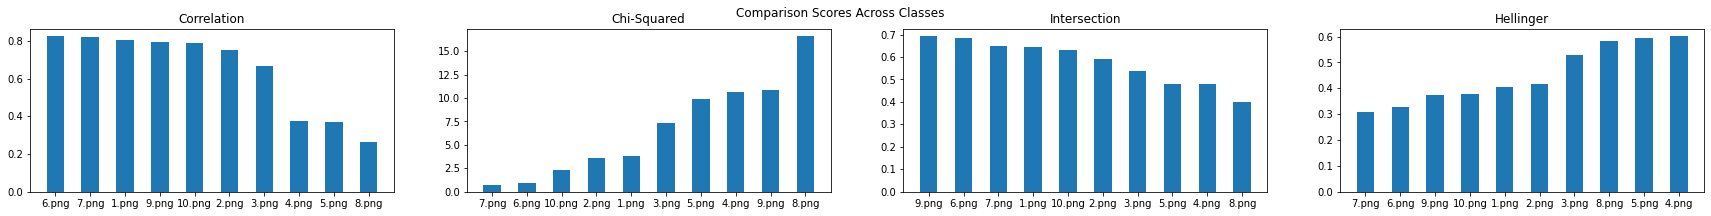

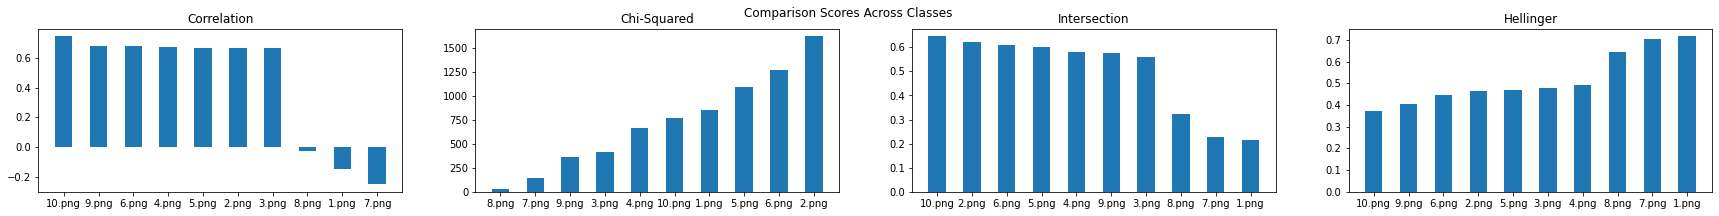

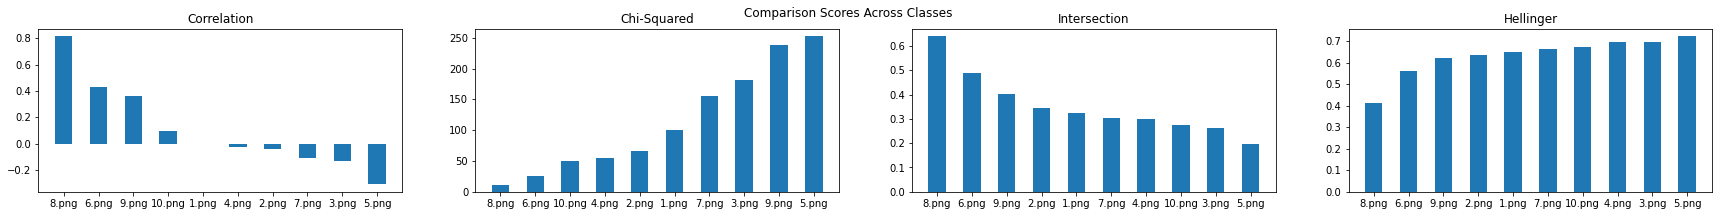

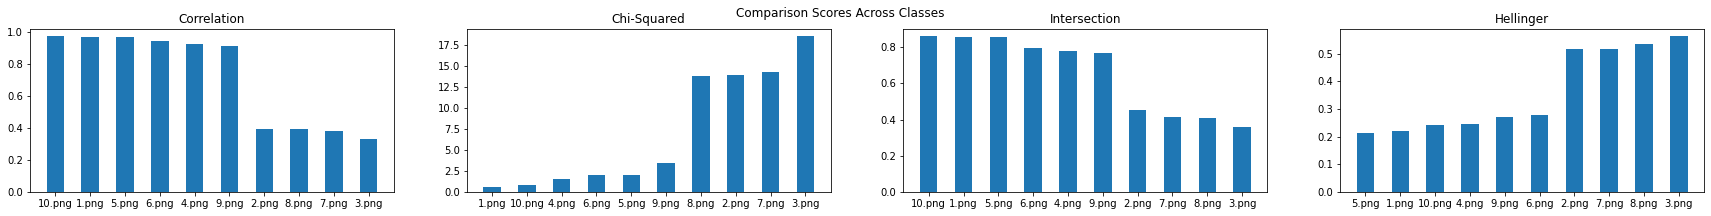

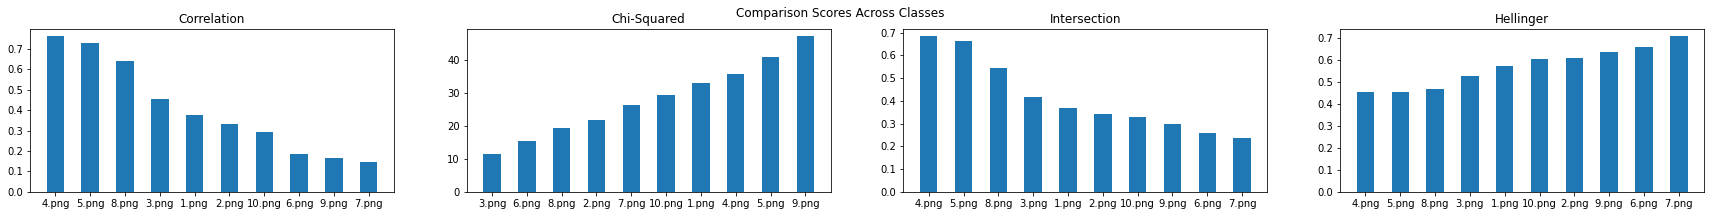

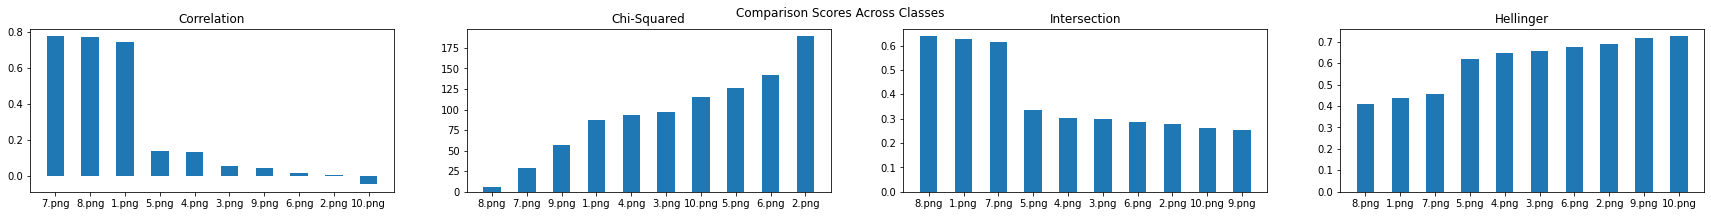

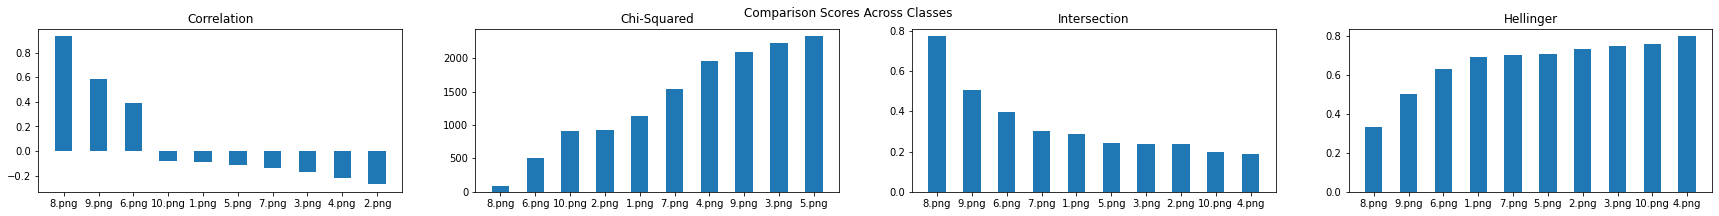

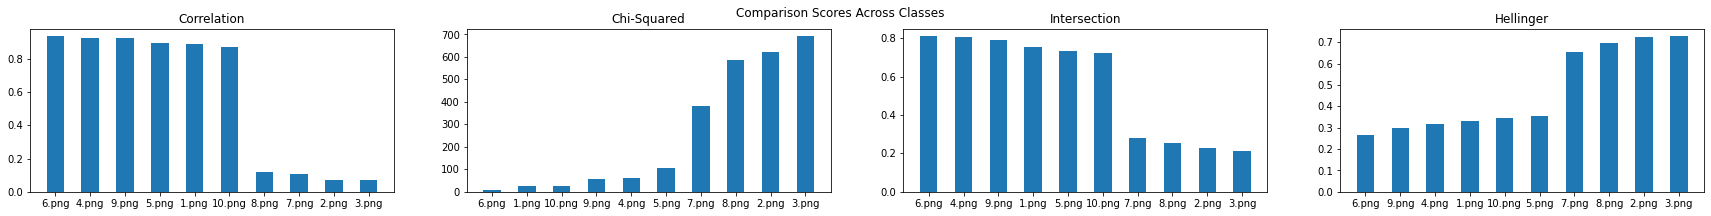

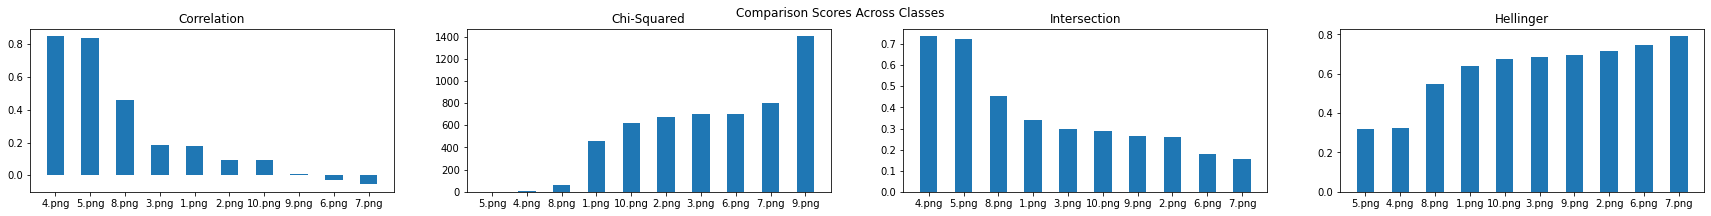

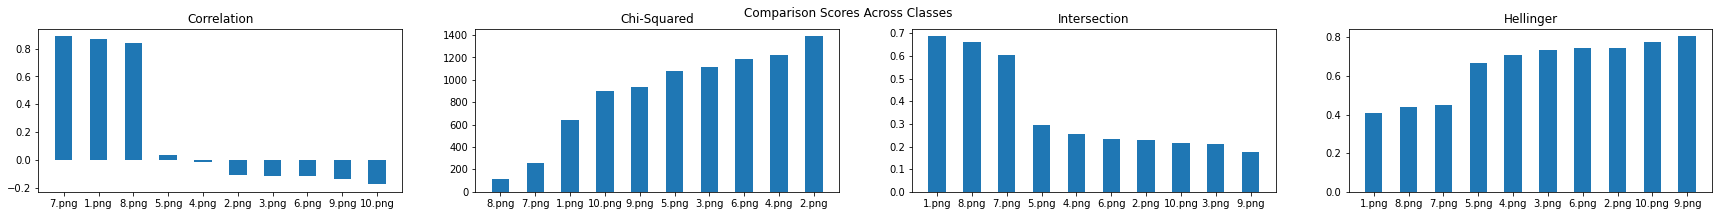

In [85]:
def plot_comparison_scores_across_classes(target_class_compare_dict):
    data = {}
    for key, values in target_class_compare_dict.items():
        print(key)
        #print ('value: ' + str(values))
        for classes, histMethod in values.items():
            print('classes: ' + str(classes))
            print('histMethod: ' + str(histMethod))
            print('Correlation: ' + str(histMethod['Correlation']))
            col1 = graphScores(histMethod,'Correlation')
            col2 = graphScores(histMethod,'Chi-Squared')
            col3 = graphScores(histMethod,'Intersection')
            col4 = graphScores(histMethod,'Hellinger')

            fig, axs = plt.subplots(1, 4, figsize=(30, 3))
            axs[0].set_title('Correlation')
            axs[0].bar(col1[0], col1[1], width = 0.5)
            axs[1].set_title('Chi-Squared')
            axs[1].bar(col2[0], col2[1], width = 0.5)
            axs[2].set_title('Intersection')
            axs[2].bar(col3[0], col3[1], width = 0.5)
            axs[3].set_title('Hellinger')
            axs[3].bar(col4[0], col4[1], width = 0.5)
            
            fig.suptitle('Comparison Scores Across Classes')

def graphScores(histMethod, name):
    data = {}
    for (scores,img) in histMethod[name]:
        data[img] = scores
        x = list(data.keys())
        y = list(data.values())
    return [x, y]
    

plot_comparison_scores_across_classes(target_class_compare_dict)


<b><h3>Task 5</h3><b>
<h4>Extrapolation of Time</h4>
Take a baseline comparison of each of the 4 OpenCV histogram matching techniques for bin_sizes : 32, 64,
128, 256, and estimate if the system needed to scan 1 Million images how long would it take?
Compare the performance of each type of histogram comparison. Plot the results using Bar Chart. 

{32: 36.376578, 64: 36.382764, 128: 36.386717, 256: 36.386765}

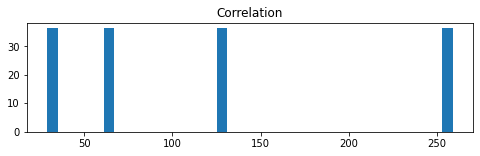

In [118]:
image_path = '/home/CV/HistogramDataset/'
class_list = ['bulbasaur','charmander','pikachu','squirtle']

bins = 8

# Process target images
image_target_dict = read(os.path.join(image_path,'targets'))
hist_target_dict = histogram_generator(image_target_dict, number_bins = bins)
#plot_histograms(hist_target_dict)

image_class_dict = dict()
hist_class_dict = dict()

for c in class_list:
    image_class_dict[c] = read(os.path.join(image_path,'classes',c))
    hist_class_dict[c] = histogram_generator(image_class_dict[c],  number_bins = bins)
    
# Process Test Images
image_mystery_dict = read(os.path.join(image_path,'mystery'))
hist_mystery_dict = histogram_generator(image_mystery_dict,  number_bins = bins)
#plot_histograms(hist_mystery_dict)

def plot_execution_times(bins):
    executionTimes = []
    data = {}
    for i in bins:
        e1 = cv2.getTickCount() 
        hists = histogram_generator(image_mystery_dict,  number_bins = i)
        e2 = cv2.getTickCount()
        t = (e2 - e1)*1000/cv2.getTickFrequency() 
        data[i] = t
        x = list(data.keys())
        y = list(data.values())
    fig, axs = plt.subplots(1, figsize=(8, 2))
    axs.set_title('Correlation')
    axs.bar(x, y, width = 6.0)
    return data

bins = [32,64,128,256]
plot_execution_times(bins)